In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install rdkit-pypi

DEPRECATION: Loading egg at /Users/zainabusman/anaconda3/lib/python3.11/site-packages/raftos-0.2.6-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [3]:
from rdkit import Chem, rdBase
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, Descriptors
from rdkit.Chem.Draw import IPythonConsole

print(rdBase.rdkitVersion)

2022.09.5


> The blood-brain barrier penetration (BBBP) dataset is designed for the modeling and prediction of barrier permeability. 

> As a membrane separating circulating blood and brain extracellular fluid, the blood-brain barrier blocks most drugs, hormones, and neurotransmitters. 

> Thus penetration of the barrier forms a long-standing issue in the development of drugs targeting the central nervous system.

> This dataset includes binary labels for over 2000 compounds on their permeability properties.

> "name" - Name of the compound

> "smiles" - SMILES representation of the molecular structure

> "p_np" - Binary labels for penetration/non-penetration

# 1. loading Blood-Brain Barrier Penetration dataset

In [4]:
#  URL site

BBBP_URL = "https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/BBBP.csv"

In [5]:
BBBP = pd.read_csv(BBBP_URL)
print(BBBP.shape)
BBBP.head()

(2050, 4)


,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...


In [6]:
BBBP.p_np.value_counts()

p_np
1    1567
0     483
Name: count, dtype: int64

# 2. Add RDKit mol object to dataset to generate descriptor 

In [7]:
PandasTools.AddMoleculeColumnToFrame(BBBP,'smiles')
print(BBBP.shape)
BBBP.head()

(2050, 5)


[16:06:37] Explicit valence for atom # 1 N, 4, is greater than permitted
[16:06:37] WARNING: not removing hydrogen atom without neighbors
[16:06:37] Explicit valence for atom # 6 N, 4, is greater than permitted
[16:06:37] WARNING: not removing hydrogen atom without neighbors
[16:06:37] WARNING: not removing hydrogen atom without neighbors
[16:06:37] WARNING: not removing hydrogen atom without neighbors
[16:06:37] WARNING: not removing hydrogen atom without neighbors
[16:06:37] WARNING: not removing hydrogen atom without neighbors
[16:06:37] WARNING: not removing hydrogen atom without neighbors
[16:06:37] Explicit valence for atom # 6 N, 4, is greater than permitted
[16:06:37] WARNING: not removing hydrogen atom without neighbors
[16:06:37] WARNING: not removing hydrogen atom without neighbors
[16:06:37] WARNING: not removing hydrogen atom without neighbors
[16:06:37] WARNING: not removing hydrogen atom without neighbors
[16:06:37] Explicit valence for atom # 11 N, 4, is greater than pe

,num,name,p_np,smiles,ROMol
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x13604b5a0>
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,<rdkit.Chem.rdchem.Mol object at 0x13604b610>
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,<rdkit.Chem.rdchem.Mol object at 0x13604b530>
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x13604ba70>
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,<rdkit.Chem.rdchem.Mol object at 0x13604bc30>


In [8]:
BBBP.info()

# NA in ROMol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   num     2050 non-null   int64 
 1   name    2050 non-null   object
 2   p_np    2050 non-null   int64 
 3   smiles  2050 non-null   object
 4   ROMol   2039 non-null   object
dtypes: int64(2), object(3)
memory usage: 80.2+ KB


# 3. remove NA

In [9]:
BBBP_2 = BBBP.dropna(axis=0) 
print(BBBP_2.shape)
BBBP_2.head()

(2039, 5)


,num,name,p_np,smiles,ROMol
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x13604b5a0>
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,<rdkit.Chem.rdchem.Mol object at 0x13604b610>
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,<rdkit.Chem.rdchem.Mol object at 0x13604b530>
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x13604ba70>
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,<rdkit.Chem.rdchem.Mol object at 0x13604bc30>


# 4. call descriptors through ROMol

In [10]:
for i,j in Descriptors.descList:
    BBBP_2[i] = BBBP_2['ROMol'].map(j)

[16:06:48] WARNING: not removing hydrogen atom without neighbors
[16:06:48] WARNING: not removing hydrogen atom without neighbors
[16:06:48] WARNING: not removing hydrogen atom without neighbors
[16:06:48] WARNING: not removing hydrogen atom without neighbors
[16:06:48] WARNING: not removing hydrogen atom without neighbors
[16:06:48] WARNING: not removing hydrogen atom without neighbors
[16:06:48] WARNING: not removing hydrogen atom without neighbors
[16:06:48] WARNING: not removing hydrogen atom without neighbors
[16:06:48] WARNING: not removing hydrogen atom without neighbors
[16:06:48] WARNING: not removing hydrogen atom without neighbors
[16:06:48] WARNING: not removing hydrogen atom without neighbors
[16:06:48] WARNING: not removing hydrogen atom without neighbors
[16:06:48] WARNING: not removing hydrogen atom without neighbors
[16:06:48] WARNING: not removing hydrogen atom without neighbors
[16:06:49] WARNING: not removing hydrogen atom without neighbors
[16:06:49] WARNING: not r

In [11]:
print(BBBP_2.shape)
BBBP_2.head()

(2039, 213)


,num,name,p_np,smiles,ROMol,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x13604b5a0>,9.843954,-0.498733,9.843954,0.000000,0.859050,...,0,0,0,0,0,0,0,0,0,0
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,<rdkit.Chem.rdchem.Mol object at 0x13604b610>,11.682268,-0.409691,11.682268,0.134704,0.474821,...,0,0,0,0,0,0,0,0,0,0
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...,<rdkit.Chem.rdchem.Mol object at 0x13604b530>,14.983653,-1.315329,14.983653,0.043359,0.874740,...,0,0,0,0,0,0,0,0,0,0
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x13604ba70>,10.754123,0.012527,10.754123,0.012527,0.784810,...,0,0,0,0,0,0,0,0,2,0
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...,<rdkit.Chem.rdchem.Mol object at 0x13604bc30>,12.995623,-1.056471,12.995623,0.195733,0.709265,...,1,0,0,0,0,0,0,0,0,0


In [12]:
BBBP_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2039 entries, 0 to 2049
Columns: 213 entries, num to fr_urea
dtypes: float64(104), int64(106), object(3)
memory usage: 3.3+ MB


In [13]:
pd.set_option('display.max_seq_items', None)
BBBP_2.columns

Index(['num', 'name', 'p_np', 'smiles', 'ROMol', 'MaxEStateIndex',
       'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed',
       'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons',
       'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge',
       'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW',
       'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW',
       'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n',
       'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v',
       'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3',
       'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12',
       'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4',
       'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9',
       'SMR_VSA1', 'SMR_VSA10', 'SMR_

In [14]:
BBBP_2.isna().sum().sum()

144

In [15]:
# remove NA 

BBBP_3 = BBBP_2.dropna(axis=0)
BBBP_3.isna().sum().sum()

0

# 5. Structure of BBBP_3 molecular by Penetration/Non-Penetration 

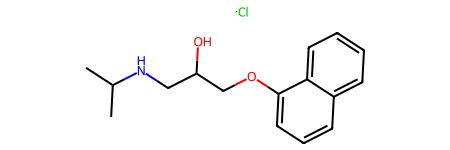

In [16]:
# Structure of BBBP_3 1st molecular

BBBP_3_0 = Chem.MolFromSmiles(BBBP_3.smiles[0])
BBBP_3_0
# Propanolol

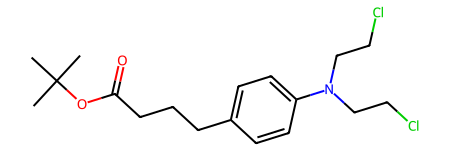

In [17]:
# Structure of BBBP_3 2nd molecular

BBBP_3_1 = Chem.MolFromSmiles(BBBP_3.smiles[1])
BBBP_3_1
# Terbutylchlorambucil 

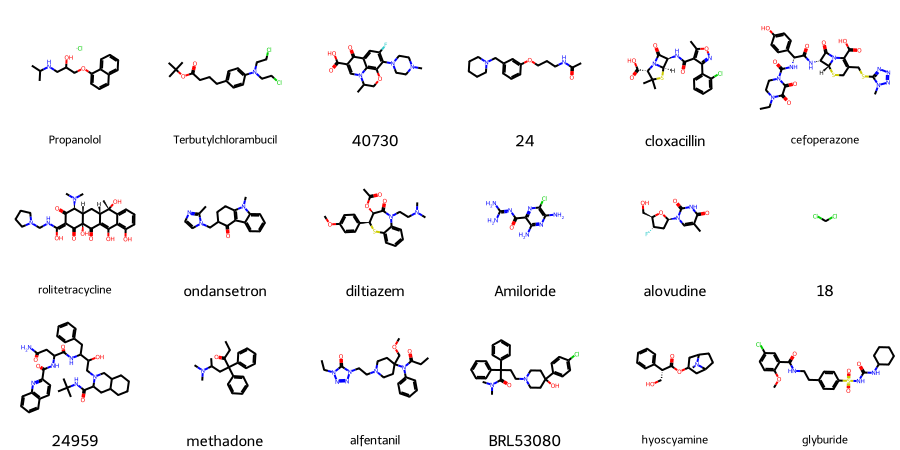

In [18]:
# penetration molecular

penetration_molecular = BBBP_3[BBBP_3['p_np']==1]
penetration_molecular_18 = PandasTools.FrameToGridImage(penetration_molecular[:18], 
                                                  column='ROMol', legendsCol='name', 
                                                  molsPerRow=6, subImgSize=(150,150))
penetration_molecular_18

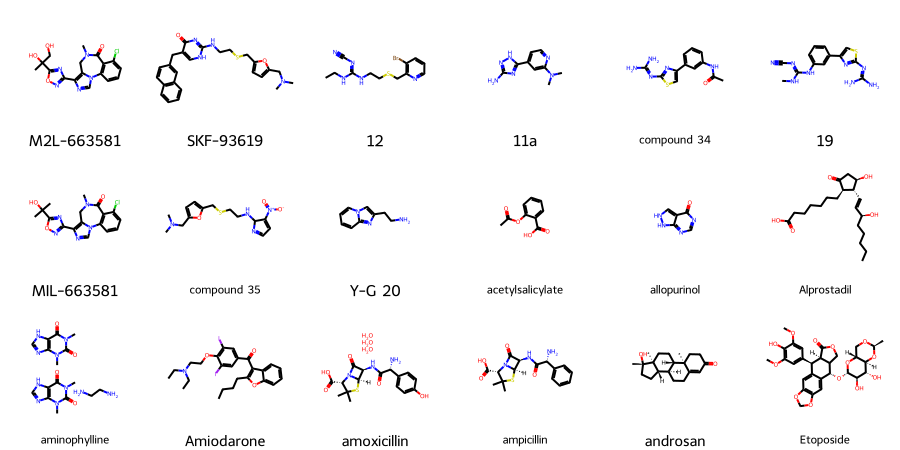

In [19]:
# non_penetration molecular

non_penetration_molecular = BBBP_3[BBBP_3['p_np']==0]
non_penetration_molecular_18 = PandasTools.FrameToGridImage(non_penetration_molecular[:18], 
                                                            column='ROMol', legendsCol='name', 
                                                            molsPerRow=6, subImgSize=(150,150))
non_penetration_molecular_18

# 6. Distribution of Structural Descriptors

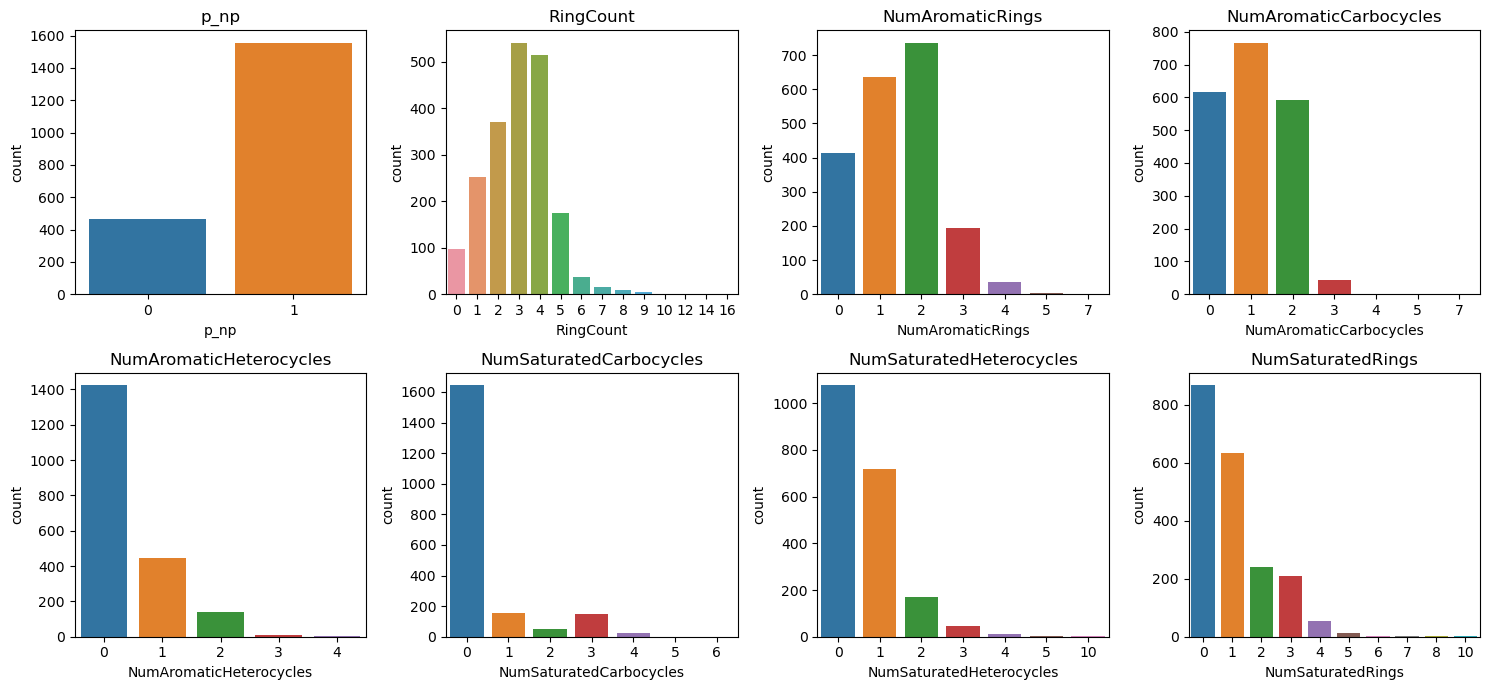

In [20]:
import math

list = ["p_np", "RingCount", "NumAromaticRings", "NumAromaticCarbocycles", "NumAromaticHeterocycles", 
        "NumSaturatedCarbocycles", "NumSaturatedHeterocycles", "NumSaturatedRings"]

fig = plt.figure(figsize=(15,7))
for i, c in enumerate(list):
   ax = fig.add_subplot(
       math.ceil(len(list) / 4), 4, i + 1)
   
   sns.countplot(x=c, data=BBBP_3,  ax=ax)
   ax.set_title(c)
fig.tight_layout()
plt.show()

# 7. Classify Structural Descriptors by Penetration/Non-Penetration

<Axes: xlabel='MolWt', ylabel='MolLogP'>

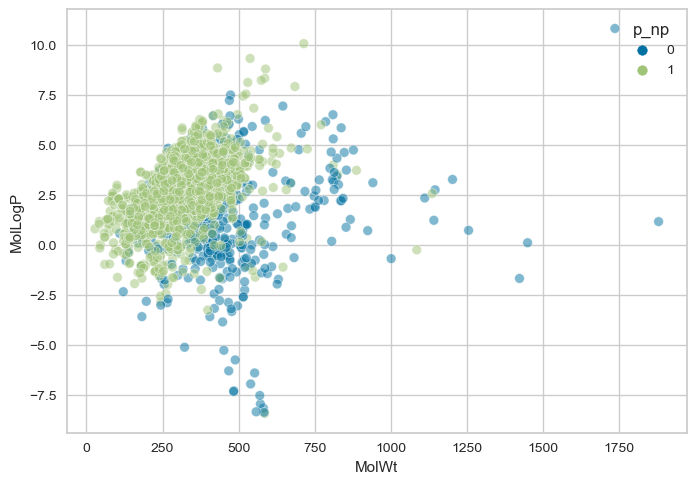

In [36]:
# logP Vs molecular weight

sns.scatterplot(x="MolWt", y="MolLogP", data=BBBP_3, hue="p_np", alpha=0.5)

# 9. Classification - target and features

In [37]:
# target

target = BBBP_3['p_np']
print(target.shape)
print(target.value_counts())

(2021,)
p_np
1    1555
0     466
Name: count, dtype: int64


In [38]:
# features 

features = BBBP_3.drop(['num', 'name', 'p_np', 'smiles', 'ROMol'], axis=1)
print(features.shape)
features.head()

(2021, 208)


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,9.843954,-0.498733,9.843954,0.000000,0.859050,294.802,273.634,294.126082,109,1,...,0,0,0,0,0,0,0,0,0,0
1,11.682268,-0.409691,11.682268,0.134704,0.474821,360.325,333.109,359.141884,130,0,...,0,0,0,0,0,0,0,0,0,0
2,14.983653,-1.315329,14.983653,0.043359,0.874740,361.373,341.213,361.143784,138,0,...,0,0,0,0,0,0,0,0,0,0
3,10.754123,0.012527,10.754123,0.012527,0.784810,290.407,264.199,290.199428,116,0,...,0,0,0,0,0,0,0,0,2,0
4,12.995623,-1.056471,12.995623,0.195733,0.709265,435.889,417.745,435.065569,152,0,...,1,0,0,0,0,0,0,0,0,0


In [39]:
features.isna().sum().sum()

0

In [40]:
features.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.0,2021.000000,2021.000000,2021.000000
mean,10.924088,-0.800636,10.924088,0.227086,0.627613,343.700486,321.128469,343.280208,128.975260,0.003464,...,0.109352,0.028204,0.010886,0.007917,0.009896,0.023256,0.0,0.016823,0.158832,0.042553
std,3.371966,1.274373,3.371966,0.314107,0.203213,150.513891,140.824286,150.371699,58.117774,0.058765,...,0.372862,0.185345,0.112928,0.088646,0.099010,0.160301,0.0,0.136120,0.744623,0.204335
min,1.500000,-6.672500,1.500000,0.000000,0.034288,28.054000,24.022000,28.031300,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,9.929630,-1.277280,9.929630,0.040966,0.512507,256.099000,240.177000,255.198700,96.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,11.974252,-0.518681,11.974252,0.111635,0.677389,323.465000,302.297000,323.145619,120.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,12.932057,0.004362,12.932057,0.281111,0.783613,409.423000,383.617000,409.166492,154.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,17.815441,3.000000,17.815441,3.793981,0.945893,1879.680000,1781.904000,1877.556582,706.000000,1.000000,...,4.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.0,2.000000,13.000000,2.000000


<Axes: >

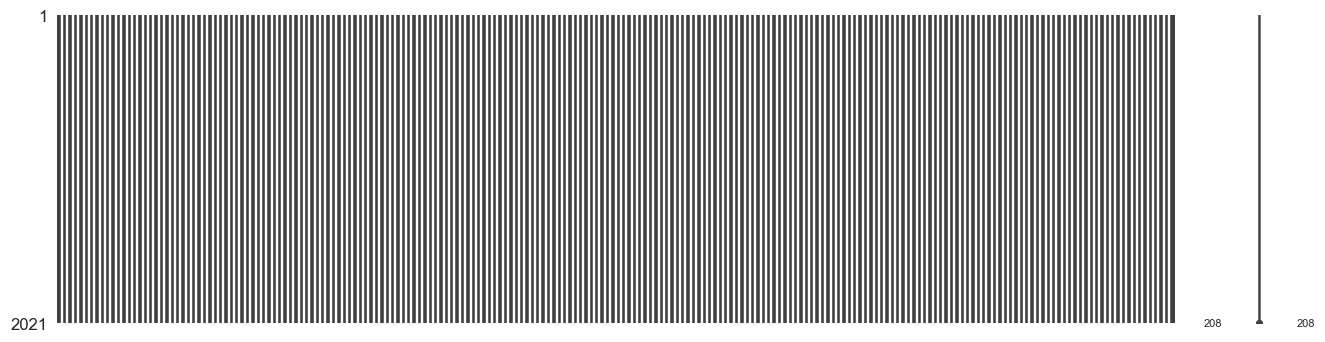

In [41]:
import missingno as msno

msno.matrix(features, figsize=(16, 4),  fontsize=10)

# 10.  Classification - feature selection

In [42]:
corr_rate_threshold = 0.95

cor_matrix = features.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= corr_rate_threshold)]
selected_features = features.drop(features[to_drop], axis = 1)
selected_features.shape

(2021, 174)

In [43]:
from sklearn.model_selection import train_test_split, KFold

kf = KFold(n_splits = 5, shuffle = True, random_state=2308) 
for tr_idx, te_idx in kf.split(selected_features): 
    X_train, X_test = selected_features.iloc[tr_idx], selected_features.iloc[te_idx]
    y_train, y_test = target.iloc[tr_idx], target.iloc[te_idx]
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1617, 174), (404, 174), (1617,), (404,))

In [44]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler() 

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)



X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1617, 174), (404, 174), (1617,), (404,))

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train)
print(y_train[:30])

y_test = le.fit_transform(y_test)
print(y_test[:30])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]
[1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0]


# 11. dummy model

In [46]:
# baseline modeling

from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='stratified', random_state=2308)

dummy.fit(X_train, y_train)

print(dummy.score(X_train, y_train))
print(dummy.score(X_test, y_test))

0.6518243661100804
0.6410891089108911


In [47]:
classes = target.unique() 
classes

array([1, 0])

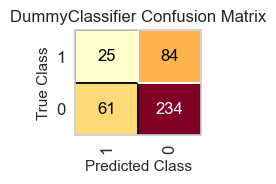

ConfusionMatrix(ax=<Axes: title={'center': 'DummyClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=array([1, 0]),
                cmap=<matplotlib.colors.ListedColormap object at 0x13cf88590>,
                estimator=DummyClassifier(random_state=2308,
                                          strategy='stratified'))

In [48]:
from yellowbrick.classifier import confusion_matrix

plt.figure(figsize=(2, 2))
confusion_matrix(dummy, X_train, y_train, X_test, y_test, classes=classes)

# 12. RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))



0.9956709956709957
0.8688118811881188


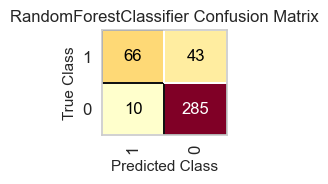

ConfusionMatrix(ax=<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=array([1, 0]),
                cmap=<matplotlib.colors.ListedColormap object at 0x13ce45390>,
                estimator=RandomForestClassifier())

In [50]:
plt.figure(figsize=(2, 2))
confusion_matrix(rfc, X_train, y_train, X_test, y_test, classes=classes)

# 13. DecisionTreeClassifier model

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.9956709956709957
0.8168316831683168


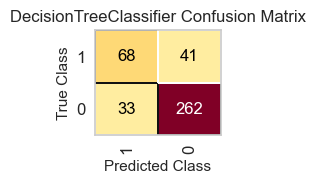

ConfusionMatrix(ax=<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=array([1, 0]),
                cmap=<matplotlib.colors.ListedColormap object at 0x13d062f90>,
                estimator=DecisionTreeClassifier())

In [52]:
plt.figure(figsize=(2, 2))
confusion_matrix(dtc, X_train, y_train, X_test, y_test, classes=classes)

# 14. XGBClassifier

In [53]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=1000, random_state=2304, eval_metric='mlogloss', use_label_encoder=False)

xgbc.fit(X_train, y_train)

print(xgbc.score(X_train, y_train))
print(xgbc.score(X_test, y_test))

pred_proba = xgbc.predict_proba(X_test)[:, 1]
pred_proba[:20]


0.9956709956709957
0.8539603960396039


array([9.9993384e-01, 9.9891376e-01, 1.1079885e-02, 9.8924810e-01,
       2.8961627e-02, 1.9602754e-05, 7.3793316e-01, 8.4622458e-02,
       9.9999225e-01, 1.0063952e-03, 9.9993074e-01, 9.9611521e-01,
       9.9951804e-01, 9.9923992e-01, 9.9667990e-01, 9.9890149e-01,
       9.9940825e-01, 9.9732590e-01, 9.9998486e-01, 9.9985683e-01],
      dtype=float32)

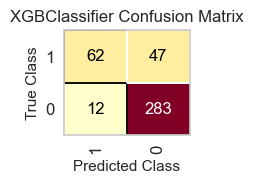

ConfusionMatrix(ax=<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=array([1, 0]),
                cmap=<matplotlib.colors.ListedColormap object at 0x13d0bbd10>,
                estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        early_...
                                        grow_policy=None, importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=None, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=None,
                                        max_leaves=None, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=1000,
                                        n_jobs=None, num_parallel_tree=None,
                                        random_state=2304, ...))

In [54]:
plt.figure(figsize=(2, 2))
confusion_matrix(xgbc, X_train, y_train, X_test, y_test, classes=classes)

# 15. feature importance

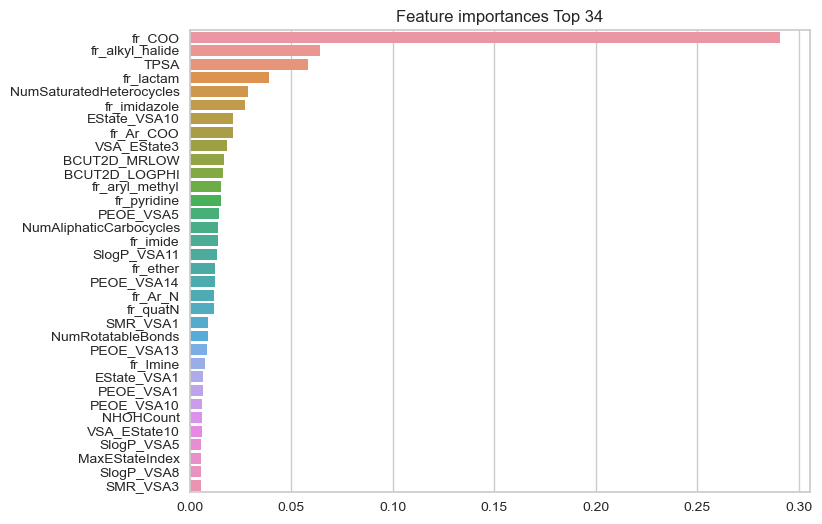

In [55]:
import seaborn as sns

XGBClassifier_importances_values = xgbc.feature_importances_

XGBClassifier_importances = pd.Series(XGBClassifier_importances_values, index = X_train.columns)

XGBClassifier_top34 = XGBClassifier_importances.sort_values(ascending=False)[:34]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 34')
sns.barplot(x=XGBClassifier_top34 , y = XGBClassifier_top34.index)
plt.show()
